<a href="https://colab.research.google.com/github/mmppppss/IA_algorithms/blob/main/tiempos_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediccion del tiempo que llevara una entrega (Delivery)
## Basado en datos historicos (Distancia, Trafico, Cola de pedidos, Clima, y Tiempo de entrega)

In [58]:
import pandas as pd
import numpy as np
import math
data = pd.read_csv("https://raw.githubusercontent.com/mmppppss/IA_algorithms/refs/heads/main/datos_delivery.csv")
print(data.head())


   Distancia_km  Trafico  Pedidos  Clima  TiempoEntrega_min
0      6.243562        3        5      1          49.783749
1     14.310000        1        7      0          52.269237
2     11.247915        2        4      0          48.374215
3      9.381219        2        1      0          48.753670
4      3.184261        3        5      0          43.895556


In [ ]:
## generar datos random
"""
np.random.seed(42)
n_samples = 2000

# Variables simuladas
distancia = np.random.uniform(1, 15, n_samples)  # Distancia en km
trafico = np.random.randint(1, 4, n_samples)  # 1 = Bajo, 2 = Medio, 3 = Alto
pedidos_en_cola = np.random.randint(1, 10, n_samples)  # Número de pedidos pendientes
clima = np.random.randint(0, 2, n_samples)  # 0 = Soleado, 1 = Lluvia

# Tiempo de entrega (target variable)
tiempo_entrega = 10 + 2.5 * distancia + 5 * trafico + 1.2 * pedidos_en_cola + 4 * clima + np.random.normal(0, 3, n_samples)

# Crear DataFrame
data = pd.DataFrame({'Distancia_km': distancia, 'Trafico': trafico, 'Pedidos': pedidos_en_cola, 'Clima': clima, 'TiempoEntrega_min': tiempo_entrega})
print(data.head())"""

### Definir variables dependientes e independientes

In [59]:
# Variables predictoras (independientes)
x = data[['Distancia_km', 'Trafico', 'Pedidos', 'Clima']]

# Variable objetivo (dependiente)
y = data['TiempoEntrega_min']

### Dividir datos de entrenamiento y prueba

In [60]:
from sklearn.model_selection import train_test_split

# 80% de los datos se usan para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Entrenar el modelo

In [61]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar coeficientes del modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Tiempo de entrega (Y) =", round(modelo.intercept_,2), "+(", round(modelo.coef_[0],2), "* Distancia ) + (", round(modelo.coef_[1],2), "* Trafico ) + (", round(modelo.coef_[2],2), "* Pedidos ) + (", round(modelo.coef_[3],2), "* Clima )")

Coeficientes: [2.52936951 5.5984878  1.21021208 3.42121773]
Intercepto: 8.617633128751251
Tiempo de entrega (Y) = 8.62 +( 2.53 * Distancia ) + ( 5.6 * Trafico ) + ( 1.21 * Pedidos ) + ( 3.42 * Clima )


### Ver el error cuadratico medio

In [62]:
from sklearn.metrics import mean_squared_error

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo con error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse:.2f}')


Error cuadrático medio (MSE): 8.51


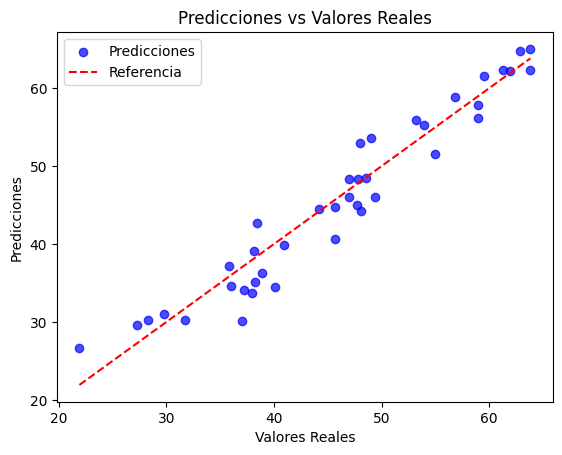

In [63]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicciones')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Referencia')

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

plt.legend()

plt.show()


In [40]:
def predecir_tiempo_entrega(distancia, trafico, pedidos, clima):
    datos_nuevos = pd.DataFrame([[distancia, trafico, pedidos, clima]],
                                columns=['Distancia_km', 'Trafico', 'Pedidos', 'Clima'])
    tiempo_estimado = modelo.predict(datos_nuevos)[0]

    return tiempo_estimado

print("Bienvenido al sistema de predicción de tiempo de entrega.")

distancia = float(input("Introduce la distancia en km: "))
trafico = int(input("Introduce el nivel de tráfico (1 = Bajo, 2 = Medio, 3 = Alto): "))
pedidos = int(input("Introduce el número de pedidos en cola: "))
clima = int(input("Introduce el clima (0 = Soleado, 1 = Lluvia): "))

tiempo_entrega_estimado = predecir_tiempo_entrega(distancia, trafico, pedidos, clima)

print(f"\nEl tiempo estimado de entrega es: {tiempo_entrega_estimado:.2f} minutos.")

Bienvenido al sistema de predicción de tiempo de entrega.
Introduce la distancia en km: 4.3
Introduce el nivel de tráfico (1 = Bajo, 2 = Medio, 3 = Alto): 3
Introduce el número de pedidos en cola: 2
Introduce el clima (0 = Soleado, 1 = Lluvia): 0

El tiempo estimado de entrega es: 38.71 minutos.
